In [14]:
import pandas as pd
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

import re

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

file_path = "period3_v4.csv"
print(os.path.exists(file_path))  # Should print True if the file exists

False


## Third Period Dataframe (`third_period_csv_v4`)
##### The dataframe, filtered after scraping data from Reddit, now contains records spanning from September 1, 2021, to May 28, 2022.

In [15]:
third_period_csv = "period3_v4.csv"
third_period = pd.read_csv(third_period_csv)

# Ensure the 'Timestamp' column is in datetime format
third_period['Timestamp'] = pd.to_datetime(third_period['Timestamp'])

# Sort by 'Timestamp' in ascending order
third_period.sort_values('Timestamp', inplace=True)

# Display the sorted DataFrame
third_period

,Type,Post_id,Title,Timestamp,Text,Score,Total_comments
2694,Comment,pf6wgx,"Comedienne Noemi Tesorero, famously known as M...",2021-09-01 01:47:08,Sad,3,0
2731,Comment,p96gde,Solaire-Nayong Filipino Drive Thru Vaccination...,2021-09-01 02:51:12,Hello po! Were you able to resched your vaccin...,1,0
2785,Comment,p96gde,Solaire-Nayong Filipino Drive Thru Vaccination...,2021-09-01 06:38:17,Ohh aight. Is it possible for u to give a head...,1,0
2691,Post,pfpfje,(09/01/21) THE PHILIPPINES HITS THE GRIM MILES...,2021-09-01 08:12:47,NaN,12,2
2692,Comment,pfpfje,(09/01/21) THE PHILIPPINES HITS THE GRIM MILES...,2021-09-01 08:15:13,Addenda:\n\n* Today's increase in cases is the...,1,0
...,...,...,...,...,...,...,...
4,Comment,uvvbab,PH COVID-19 Maps (5/22/2022),2022-05-24 00:50:30,So? No one is scared lol magsisimula nanaman k...,-6,0
5,Comment,uvvbab,PH COVID-19 Maps (5/22/2022),2022-05-24 01:18:21,"it helps being informed, dumbass",5,0
6,Comment,uvvbab,PH COVID-19 Maps (5/22/2022),2022-05-24 02:19:02,Your name suits you well,5,0
0,Post,uwrjsu,2 years and still counting....,2022-05-24 14:01:54,NaN,217,3


## Stopwords (extended)
1. English stopwords used are from nltk's existing list of englist stopwords.
2. Filipino stopwords used, stored in `stopwords_tl_json` are from a public github repository.
3. Custom stopwords or `identified_stopwords` were identified after running the LDA Model multiple times to identify which other irrelevant word and words that occur too frequently may be removed. [ threshold is set at filter_extremes as seen in cell `[31]` ]
4. using `allwords.extend`, the filipino and custom stopwords are added to the list of stopwords

In [18]:
#  from https://github.com/stopwords-iso/stopwords-tl/blob/master/stopwords-tl.json

all_stopwords = nltk.corpus.stopwords.words('english')

stopwords_tl_json = 'stopwords-tl (1).json'
stopwords_custom_json = 'stopwords-custom.json'

# Load Tagalog (Filipino) stopwords from JSON file
with open(stopwords_tl_json, 'r') as file:
    tagalog_stopwords = set(json.load(file))

# Load Tagalog (Filipino) stopwords from JSON file
with open(stopwords_custom_json, 'r') as file:
    custom_stopwords = set(json.load(file))

tagalog_stopwords_list = list(tagalog_stopwords)
custom_stopwords_list = list(custom_stopwords)

all_stopwords.extend(tagalog_stopwords_list)
all_stopwords.extend(custom_stopwords_list)

all_stopwords_list = list(all_stopwords)

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Now, combined_stopwords contains both English, Filipino, and custom stopwords
print(f"Total stopwords: {len(all_stopwords_list)}")
print(all_stopwords_list)

Total stopwords: 373
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 's

In [19]:
all_stopwords_list = sorted(all_stopwords_list)
print(all_stopwords_list)

['19', 'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'akin', 'aking', 'ako', 'alin', 'all', 'also', 'am', 'am', 'amin', 'aming', 'an', 'and', 'ang', 'ano', 'anumang', 'any', 'apat', 'are', 'aren', "aren't", 'as', 'at', 'at', 'atin', 'ating', 'ay', 'ba', 'bababa', 'bago', 'bakit', 'bawat', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'bilang', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'covid', 'd', 'dahil', 'dalawa', 'dapat', 'date', 'day', 'deleted', 'di', 'did', 'didn', "didn't", 'din', 'dito', 'do', 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'dont', 'doon', 'down', 'during', 'each', 'few', 'for', 'from', 'fully', 'further', 'gagawin', 'gayunman', 'get', 'ginagawa', 'ginawa', 'ginawang', 'go', 'got', 'gumawa', 'gusto', 'habang', 'had', 'hadn', "hadn't", 'hanggang', 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'hindi', 'his', 'how', 'http', 'https', 'huwag

## Data Preprocessing
1. All records with 'Type' == 'Comment' where 'Text' == 'NaN' (null) are dropped
2. Records are sorted by 'Timestamp' (asc) and 'Post_ids'
3. There are three dataframes:
    - all_text includes both posts and comments
    - comments_text only includes all records with Type ==  Comment
    - posts_text only includes all records with Type ==  Post

### all_text

In [20]:
# Step 1: Filter comments to keep only those with non-NaN Text
comments_noNaN = third_period[third_period['Type'] == 'Comment'].dropna(subset=['Text'])

# Step 2: Get all posts
posts = third_period[third_period['Type'] == 'Post']

# Step 3: Concatenate posts and filtered comments
all_text = pd.concat([posts, comments_noNaN], ignore_index=True)
all_text


,Type,Post_id,Title,Timestamp,Text,Score,Total_comments
0,Post,pfpfje,(09/01/21) THE PHILIPPINES HITS THE GRIM MILES...,2021-09-01 08:12:47,NaN,12,2
1,Post,pfq7lo,Vaccine Statistics (as of 08/26/21). No update...,2021-09-01 09:19:16,NaN,6,0
2,Post,pfq7ws,Vaccine Statistics (as of 08/27/21). No update...,2021-09-01 09:20:00,NaN,2,0
3,Post,pfq881,Vaccine Statistics (as of 08/28/21). No update...,2021-09-01 09:20:42,NaN,3,0
4,Post,pfq9or,Vaccine Statistics (as of 08/29/21). The Phili...,2021-09-01 09:23:58,NaN,4,1
...,...,...,...,...,...,...,...
2816,Comment,uvvbab,PH COVID-19 Maps (5/22/2022),2022-05-23 22:05:55,You fucking cabal minions.,-4,0
2817,Comment,uvvbab,PH COVID-19 Maps (5/22/2022),2022-05-24 00:50:30,So? No one is scared lol magsisimula nanaman k...,-6,0
2818,Comment,uvvbab,PH COVID-19 Maps (5/22/2022),2022-05-24 01:18:21,"it helps being informed, dumbass",5,0
2819,Comment,uvvbab,PH COVID-19 Maps (5/22/2022),2022-05-24 02:19:02,Your name suits you well,5,0


### comments_text

In [21]:
comments_text = all_text[all_text['Type'] == 'Comment']
comments_text.sort_values(by='Timestamp', inplace=True)
comments_text

<ipython-input-21-c9962328e193>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_text.sort_values(by='Timestamp', inplace=True)


,Type,Post_id,Title,Timestamp,Text,Score,Total_comments
490,Comment,pf6wgx,"Comedienne Noemi Tesorero, famously known as M...",2021-09-01 01:47:08,Sad,3,0
491,Comment,p96gde,Solaire-Nayong Filipino Drive Thru Vaccination...,2021-09-01 02:51:12,Hello po! Were you able to resched your vaccin...,1,0
492,Comment,p96gde,Solaire-Nayong Filipino Drive Thru Vaccination...,2021-09-01 06:38:17,Ohh aight. Is it possible for u to give a head...,1,0
493,Comment,pfpfje,(09/01/21) THE PHILIPPINES HITS THE GRIM MILES...,2021-09-01 08:15:13,Addenda:\n\n* Today's increase in cases is the...,1,0
494,Comment,p96gde,Solaire-Nayong Filipino Drive Thru Vaccination...,2021-09-01 09:06:09,sure! i will update here,1,0
...,...,...,...,...,...,...,...
2816,Comment,uvvbab,PH COVID-19 Maps (5/22/2022),2022-05-23 22:05:55,You fucking cabal minions.,-4,0
2817,Comment,uvvbab,PH COVID-19 Maps (5/22/2022),2022-05-24 00:50:30,So? No one is scared lol magsisimula nanaman k...,-6,0
2818,Comment,uvvbab,PH COVID-19 Maps (5/22/2022),2022-05-24 01:18:21,"it helps being informed, dumbass",5,0
2819,Comment,uvvbab,PH COVID-19 Maps (5/22/2022),2022-05-24 02:19:02,Your name suits you well,5,0


### posts_text

In [22]:
posts_text = all_text[all_text['Type'] == 'Post']
posts_text.sort_values(by='Timestamp', ascending=True)
posts_text

,Type,Post_id,Title,Timestamp,Text,Score,Total_comments
0,Post,pfpfje,(09/01/21) THE PHILIPPINES HITS THE GRIM MILES...,2021-09-01 08:12:47,NaN,12,2
1,Post,pfq7lo,Vaccine Statistics (as of 08/26/21). No update...,2021-09-01 09:19:16,NaN,6,0
2,Post,pfq7ws,Vaccine Statistics (as of 08/27/21). No update...,2021-09-01 09:20:00,NaN,2,0
3,Post,pfq881,Vaccine Statistics (as of 08/28/21). No update...,2021-09-01 09:20:42,NaN,3,0
4,Post,pfq9or,Vaccine Statistics (as of 08/29/21). The Phili...,2021-09-01 09:23:58,NaN,4,1
...,...,...,...,...,...,...,...
485,Post,ua4p7t,In Search of a Neurotologic Profile in COVID-1...,2022-04-23 12:47:40,NaN,10,0
486,Post,uglat2,PH COVID-19 Maps (5/1/2022),2022-05-02 08:54:49,NaN,113,10
487,Post,ul7cd9,PH COVID-19 Maps (5/8/2022),2022-05-08 18:00:52,NaN,69,0
488,Post,uvvbab,PH COVID-19 Maps (5/22/2022),2022-05-23 08:09:38,NaN,90,4


#### For this demo, only comments_text will be preprocessed and used for the LDA Topic Modeling...
4. The function `clean_text` is responsible for preprocessing the 'Text' of each record in comments
    - removal of special characters, line breaks, identified stopwords
    - conversion to lowercase
    - lemmmatization of terms
5. `clean_stopwords`: since the text is preprocessed, all apostrophes from the existing stopwords will be removed to match the cleaned text


In [23]:
import re
import pandas as pd
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_stopwords(stopwords_list):
    cleaned_stopwords = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in stopwords_list]
    # Remove any empty strings that may result from the cleaning
    return [word for word in cleaned_stopwords if word]

def clean_text(df, text_column, stopwords):
    # Replace line breaks with spaces
    df[text_column] = df[text_column].apply(lambda row: re.sub(r'[\n\r]+', ' ', row))

    # Remove special characters
    df[text_column] = df[text_column].apply(lambda row: re.sub(r'[^a-zA-Z0-9\s]', '', row))

    # Convert to lowercase
    df[text_column] = df[text_column].str.lower()

    # Remove stopwords
    df[text_column] = df[text_column].apply(
        lambda row: ' '.join([word for word in row.split() if word not in stopwords])
    )

    # Lemmatize words
    df[text_column] = df[text_column].apply(
        lambda row: ' '.join([lemmatizer.lemmatize(word) for word in row.split()])
    )

    # Remove leading and trailing whitespace
    df[text_column] = df[text_column].str.strip()

    return df

# Assuming comments_text is your DataFrame and it has a 'Text' column
new_stopwords = clean_stopwords(all_stopwords_list)
comments_text_cleaned = clean_text(comments_text.copy(), 'Text', new_stopwords)

# Debugging output
print(f"Stopwords used: {new_stopwords}")
print(f"Cleaned comments:\n{comments_text_cleaned.head()}")


Stopwords used: ['19', 'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'akin', 'aking', 'ako', 'alin', 'all', 'also', 'am', 'am', 'amin', 'aming', 'an', 'and', 'ang', 'ano', 'anumang', 'any', 'apat', 'are', 'aren', 'arent', 'as', 'at', 'at', 'atin', 'ating', 'ay', 'ba', 'bababa', 'bago', 'bakit', 'bawat', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'bilang', 'both', 'but', 'by', 'can', 'couldn', 'couldnt', 'covid', 'd', 'dahil', 'dalawa', 'dapat', 'date', 'day', 'deleted', 'di', 'did', 'didn', 'didnt', 'din', 'dito', 'do', 'do', 'does', 'doesn', 'doesnt', 'doing', 'don', 'dont', 'dont', 'doon', 'down', 'during', 'each', 'few', 'for', 'from', 'fully', 'further', 'gagawin', 'gayunman', 'get', 'ginagawa', 'ginawa', 'ginawang', 'go', 'got', 'gumawa', 'gusto', 'habang', 'had', 'hadn', 'hadnt', 'hanggang', 'has', 'hasn', 'hasnt', 'have', 'haven', 'havent', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'hindi', 'his', 'how', 'http', 'https'

In [ ]:
# checking the cleaned stopwords
print(new_stopwords)
print(len(new_stopwords))

['19', 'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'akin', 'aking', 'ako', 'alin', 'all', 'also', 'am', 'am', 'amin', 'aming', 'an', 'and', 'ang', 'ano', 'anumang', 'any', 'apat', 'are', 'aren', 'arent', 'as', 'at', 'at', 'atin', 'ating', 'ay', 'ba', 'bababa', 'bago', 'bakit', 'bawat', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'bilang', 'both', 'but', 'by', 'can', 'couldn', 'couldnt', 'covid', 'd', 'dahil', 'dalawa', 'dapat', 'date', 'day', 'deleted', 'di', 'did', 'didn', 'didnt', 'din', 'dito', 'do', 'do', 'does', 'doesn', 'doesnt', 'doing', 'don', 'dont', 'dont', 'doon', 'down', 'during', 'each', 'few', 'for', 'from', 'fully', 'further', 'gagawin', 'gayunman', 'get', 'ginagawa', 'ginawa', 'ginawang', 'go', 'got', 'gumawa', 'gusto', 'habang', 'had', 'hadn', 'hadnt', 'hanggang', 'has', 'hasn', 'hasnt', 'have', 'haven', 'havent', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'hindi', 'his', 'how', 'http', 'https', 'huwag', 'i', 

In [26]:
# just for checking the terms after preprocessing
comments_text_cleaned.to_csv('comments_text_cleaned.csv', index=False)

In [29]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.4 MB/s eta 0:00:00


In [30]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel, LdaMulticore
from gensim.test.utils import simple_preprocess, common_texts
from matplotlib import pyplot as plt
import numpy as np
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from statistics import mean

In [31]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The function `sent_to_words` is responsible for convering a document into a list of tokens.

In [32]:
import re

# def sent_to_words(sentences):
#     for sentence in sentences:
#         # Tokenize and retain alphanumeric words (like "2nd")
#         yield [word for word in re.findall(r'\w+', sentence.lower()) if word]


def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))

The function `get_jaccard_similarity` calculates the Jaccard similarity between two sets of topics by comparing the average similarity score between them.

In [ ]:
def get_jaccard_similarity(topic_1, topic_2):
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))

    return float(len(intersection))/float(len(union)) if union != 0 else 0

The function `coherence_score_graph` calculates and visualizes coherence scores and Jaccard similarity averages for a range of topic numbers (from 2 to 10) in a corpus. Here’s a breakdown:

1. **Preprocessing**: It tokenizes text data and creates bigrams and trigrams, then generates a dictionary and corpus for modeling.
2. **LDA Modeling**: For each specified topic count, it trains an LDA model, extracts the top words per topic, and calculates the coherence score using the `c_v` metric.
3. **Jaccard Similarity**: For each LDA model, it calculates the average Jaccard similarity between topics.
4. **Visualization**: It plots coherence scores and Jaccard similarity averages against the number of topics to evaluate model performance, highlighting the best scores for both metrics.

In [ ]:
def coherence_score_graph(dataframe):
    coherence_scores = []
    x = dataframe['Text'].tolist()  # Directly use 'Text' column
    docs = list(sent_to_words(x))  # Additional tokenization for each sentence inside the list of tokenized Text

    # Create bigrams and trigrams
    bigram = gensim.models.Phrases(docs, min_count=5)
    trigram = gensim.models.Phrases(bigram[docs])

    # Add bigrams and trigrams to docs
    for idx in range(len(docs)):
        for token in bigram[docs[idx]]:
            if '_' in token:
                docs[idx].append(token)
        for token in trigram[docs[idx]]:
            if '_' in token:
                docs[idx].append(token)

    # Create dictionary and corpus
    gsim_dict = Dictionary(docs)
    gsim_dict.filter_extremes(no_below=5, no_above=0.80)
    corpus = [gsim_dict.doc2bow(doc) for doc in docs]

    # Initialize dictionary
    temp = gsim_dict[0]
    id2word = gsim_dict.id2token

    LDA_topics = {}
    for topic in range(2, 11):
        # Train LDA model
        gsim_lda = LdaMulticore(corpus=corpus, num_topics=topic, id2word=id2word, passes=50, iterations=100)  #modified
        shown_topics = gsim_lda.show_topics(num_topics=topic, num_words=15, formatted=False)
        LDA_topics[topic] = [[word[0] for word in topic[1]] for topic in shown_topics]

        # Coherence score calculation
        c_model = CoherenceModel(model=gsim_lda, corpus=corpus, coherence='c_v', texts=docs, dictionary=gsim_dict)
        coherence = c_model.get_coherence()
        coherence_scores.append(coherence)

    # Calculate Jaccard average for each model
    jaccard_avgs = []
    for model in range(2, 11):
        lda_model = LDA_topics[model]
        jaccard_sims = []
        for i in range(len(lda_model) - 1):
            for j in range(i + 1, len(lda_model)):
                j_sim = get_jaccard_similarity(lda_model[i], lda_model[j])
                jaccard_sims.append(j_sim)
        jaccard_avgs.append(mean(jaccard_sims))

    # Data frame for plotting
    frame = pd.DataFrame({
        'Topics': range(2, 11),
        'Coherence Scores': coherence_scores,
        'Jaccard Avg': jaccard_avgs
    })

    # Plot coherence scores
    plt.figure(figsize=(12, 6))
    plt.plot(frame['Topics'], frame['Coherence Scores'], marker='o', label='Coherence Score (c_v)')
    plt.title("Corpus Coherence Scores (c_v)")
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence Score (c_v)")
    plt.axhline(y=max(coherence_scores), color='r', linestyle='--', label='Best Coherence Score')
    plt.legend()
    plt.show()

    # Plot Jaccard averages
    plt.figure(figsize=(12, 6))
    plt.plot(frame['Topics'], frame['Jaccard Avg'], marker='o', label='Jaccard Avg')
    plt.title("Corpus Jaccard Averages")
    plt.xlabel("Number of Topics")
    plt.ylabel('Jaccard Average')
    plt.axhline(y=min(jaccard_avgs), color='r', linestyle='--', label='Best Jaccard Average')
    plt.legend()
    plt.show()

### Coherence Score and Jaccard Average Computations

#### First Run

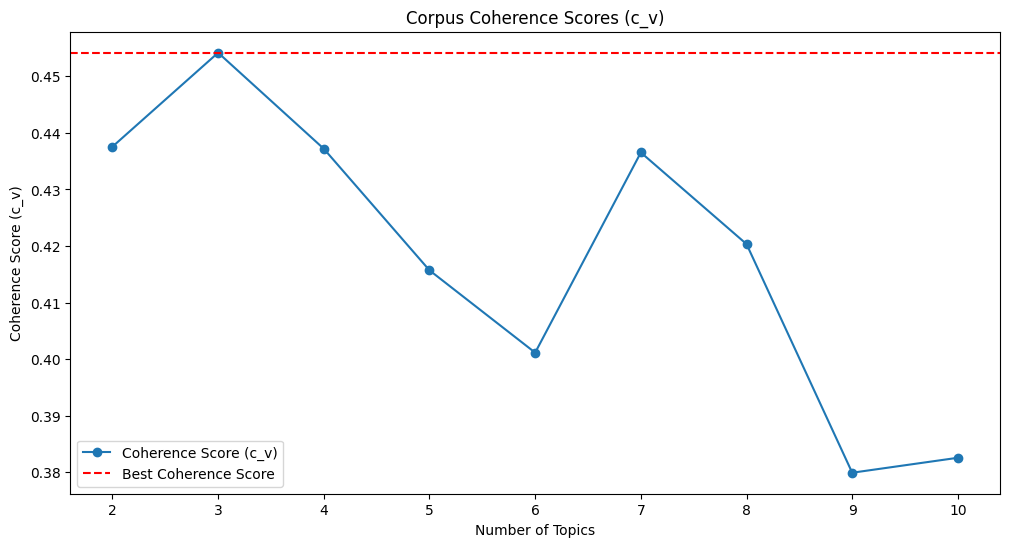

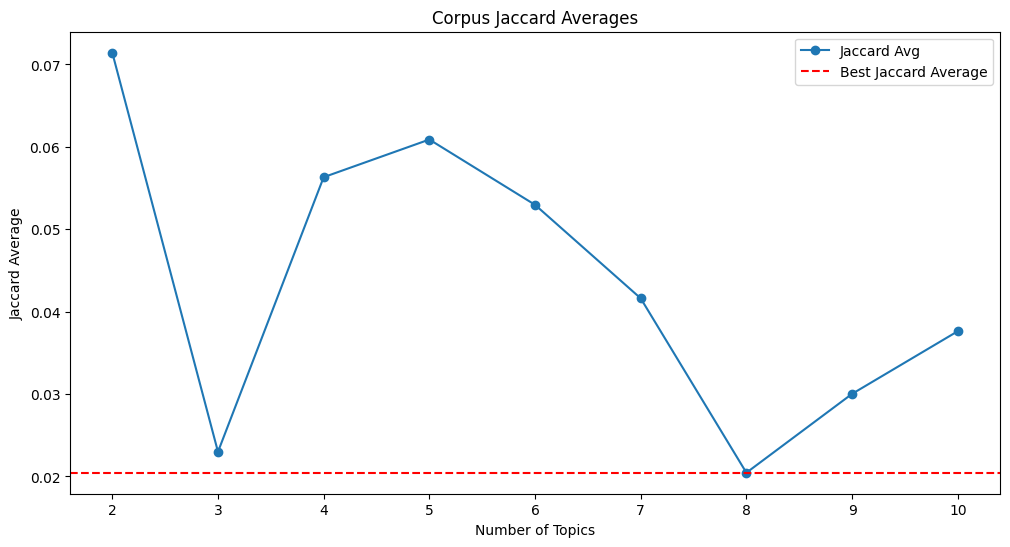

In [ ]:
coherence_score_graph(comments_text_cleaned)

After running, the LDA model with three topics consistently produced the highest coherence scores, making it the preferred topic count. Coherence scores measure how well words within topics are semantically related, and in this case, three topics showed the strongest internal consistency. <br>

# LDA Topic Modeling Analysis

## Description
This code provides functions for training an LDA (Latent Dirichlet Allocation) topic model, extracting topic terms, and visualizing topic distributions using PyLDAvis. Here’s an overview of each function:

1. **`train_lda_model(dataframe, num_topics)`**:
   - Preprocesses a given text dataset by tokenizing and adding bigram/trigram phrases.
   - Generates a Gensim dictionary and corpus and trains an LDA model with a specified number of topics.

2. **`get_topic_terms(lda_model, num_topics)`**:
   - Extracts the top terms from each topic in the LDA model and outputs them as a DataFrame with term weights and frequencies.

3. **`display_lda_vis(lda_model, corpus, dictionary)`**:
   - Creates an interactive PyLDAvis visualization of the LDA model, enabling in-depth exploration of topic distributions and relationships.

## Usage
These functions allows for training an LDA model, view key terms within each topic, and generate an interactive visualization for further analysis.


In [33]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import Phrases
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pandas as pd

# Function to train the LDA model
def train_lda_model(dataframe, num_topics):
    x = dataframe['Text'].tolist()
    docs = list(sent_to_words(x))

    # Create bigrams and trigrams
    bigram = gensim.models.Phrases(docs, min_count=5)
    trigram = gensim.models.Phrases(bigram[docs])

    # Add bigrams and trigrams to docs
    for idx in range(len(docs)):
        for token in bigram[docs[idx]]:
            if '_' in token:
                docs[idx].append(token)
        for token in trigram[docs[idx]]:
            if '_' in token:
                docs[idx].append(token)

    # Create dictionary and corpus
    gsim_dict = Dictionary(docs)
    gsim_dict.filter_extremes(no_below=5, no_above=0.80)
    corpus = [gsim_dict.doc2bow(doc) for doc in docs]

    # Train LDA model
    gsim_lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=gsim_dict, passes=50, iterations=100)

    return gsim_lda, corpus, gsim_dict

# Function to get topic terms as a DataFrame
def get_topic_terms(lda_model, corpus, dictionary, num_topics):
    topic_term_count = []

    # Generate term counts for the entire corpus
    term_counts = {}
    for doc in corpus:
        for term_id, freq in doc:
            term = dictionary[term_id]
            if term in term_counts:
                term_counts[term] += freq
            else:
                term_counts[term] = freq

    # Retrieve terms and weights for each topic
    for idx in range(num_topics):
        terms = lda_model.show_topic(idx, topn=15)  # Get the top 15 terms
        for term, weight in terms:
            count = term_counts.get(term, 0)  # Get count from term_counts
            topic_term_count.append({'Topic': idx, 'Term': term, 'Weight': weight, 'Count': count})

    topic_term_df = pd.DataFrame(topic_term_count)
    return topic_term_df

# Function to generate and display PyLDAvis visualization
def display_lda_vis(lda_model, corpus, dictionary):
    pyLDAvis.enable_notebook()
    p = gensimvis.prepare(lda_model, corpus, dictionary)
    return p


## LDA (3 Topics)

In [34]:
# Run the LDA model
lda_model_v1, corpus_v1, dictionary_v1 = train_lda_model(comments_text_cleaned, num_topics=3)

# Print the topic-term DataFrame
topic_term_df_v1 = get_topic_terms(lda_model_v1, corpus_v1, dictionary_v1, num_topics=3)
topic_term_df_v1


,Topic,Term,Weight,Count
0,0,positive,0.022479,175
1,0,test,0.019496,158
2,0,antigen_test,0.014102,66
3,0,symptom,0.009685,159
4,0,antigen,0.009411,44
5,0,day,0.009260,239
6,0,virus,0.009255,108
7,0,pcr,0.007247,46
8,0,tested_positive,0.007176,99
9,0,negative,0.006919,68


In [ ]:
# Display the PyLDAvis visualization
lda_vis_v1 = display_lda_vis(lda_model_v1, corpus_v1, dictionary_v1)
lda_vis_v1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.138867  0.169058       1        1  44.562782
1     -0.099765 -0.188593       2        1  31.028047
0      0.238632  0.019535       3        1  24.409171, topic_info=              Term        Freq       Total Category  logprob  loglift
237        vaccine  568.000000  568.000000  Default  30.0000  30.0000
187       positive  231.000000  231.000000  Default  29.0000  29.0000
650           test  193.000000  193.000000  Default  28.0000  28.0000
11            case  244.000000  244.000000  Default  27.0000  27.0000
1351  booster_shot  179.000000  179.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
441           mean   46.287547   66.147017   Topic3  -5.2420   1.0532
503           time   67.358287  164.721102   Topic3  -4.8668   0.5160
181         people   68.220063  237.720071   Topic3  -4.8541   0.1619
12             day   56.919823  168.833815   Topic3  -5.0352   0.3229
298        already   45.654267   91.562031   Topic3  -5.2558   0.7143

[185 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1577      3  0.984817   active_case
21        1  0.994291  administered
401       2  0.983454          alam
298       2  0.491470       already
298       3  0.502392       already
...     ...       ...           ...
344       2  0.112183       variant
436       1  0.142288         virus
436       3  0.862095         virus
711       2  0.979345           yun
1230      2  0.976977           yup

[219 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

# Top Terms Daily Count Dataframe

In [37]:
import pandas as pd

# Assuming comments_text_cleaned is already defined
# Convert 'Timestamp' to datetime
comments_text_cleaned['Timestamp'] = pd.to_datetime(comments_text_cleaned['Timestamp'])

# Step 1: Extract top terms for each topic
num_topics = topic_term_df_v1['Topic'].nunique()
topic_terms = {i: topic_term_df_v1[topic_term_df_v1['Topic'] == i]['Term'].values for i in range(num_topics)}

# Step 2: Prepare a dictionary to hold DataFrames for each topic
topic_dataframes = {}

# Step 3: Loop through each topic to create DataFrames
for topic, terms in topic_terms.items():
    # Create a DataFrame with Date column
    date_counts = pd.DataFrame({'date': comments_text_cleaned['Timestamp'].dt.date.unique()})
    date_counts.sort_values(by='date', inplace=True, ascending=True)  # Sort dates in ascending order

    # Initialize columns for each top term
    for term in terms:
        date_counts[term] = 0  # Set initial frequency to 0

    # Step 4: Count occurrences of each top term per date
    for date in date_counts['date']:
        # Filter comments for the specific date
        daily_comments = comments_text_cleaned[comments_text_cleaned['Timestamp'].dt.date == date]['Text']

        for term in terms:
            # Count occurrences of the term in daily comments
            term_count = sum(comment.lower().split().count(term.lower()) for comment in daily_comments)
            date_counts.loc[date_counts['date'] == date, term] = term_count  # Update count for the term

    # Store the DataFrame for the current topic
    topic_dataframes[topic] = date_counts

# Now, topic_dataframes contains separate DataFrames for each topic
# You can access them as follows:
# topic_0_df = topic_dataframes[0]
# topic_1_df = topic_dataframes[1]
# ...


In [35]:
doh_csv = "DOH_cases_T3.csv"
doh = pd.read_csv(doh_csv)
doh


,date,new_cases
0,2021-09-01,14056.0
1,2021-09-02,16397.0
2,2021-09-03,20060.0
3,2021-09-04,12829.0
4,2021-09-04,7687.0
...,...,...
267,2022-05-24,145.0
268,2022-05-25,170.0
269,2022-05-26,194.0
270,2022-05-27,202.0


### Topic 1 Dataframe

In [38]:
topic1_df = topic_dataframes[0]
topic1_df

,date,positive,test,antigen_test,symptom,antigen,day,virus,pcr,tested_positive,negative,test_positive,result,tested,rt_pcr,work
0,2021-09-01,4,0,0,0,0,9,0,0,0,3,0,3,0,0,0
1,2021-09-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-09-03,0,0,0,0,0,2,0,0,0,0,0,0,3,0,0
3,2021-09-04,1,0,0,0,0,3,0,0,0,1,0,1,0,0,0
4,2021-09-05,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2022-05-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180,2022-05-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
181,2022-05-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182,2022-05-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Topic 2 Dataframe

In [39]:
topic2_df = topic_dataframes[2]
topic2_df

,date,case,active_case,dos,vaccine,number,doh,covid,two,rate,case_bulletin,data,day,active,based,number_case
0,2021-09-01,1,0,33,27,0,0,0,18,11,0,4,9,0,15,0
1,2021-09-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-09-03,3,0,0,0,0,1,0,0,0,0,1,2,0,0,0
3,2021-09-04,0,0,11,10,0,0,0,6,3,0,1,3,0,5,0
4,2021-09-05,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2022-05-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180,2022-05-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
181,2022-05-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182,2022-05-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Topic 3 Dataframe

In [40]:
topic3_df = topic_dataframes[1]
topic3_df

,date,vaccine,booster,people,booster_shot,sinovac,pfizer,shot,dose,nd_dose,vaccinated,moderna,side_effect,one,pfizer_moderna,time
0,2021-09-01,27,0,6,0,0,0,1,4,0,2,0,0,7,0,0
1,2021-09-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-09-03,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,2021-09-04,10,0,2,0,0,0,0,1,0,0,0,0,2,0,0
4,2021-09-05,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2022-05-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180,2022-05-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
181,2022-05-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182,2022-05-24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [44]:
df_cases = pd.read_csv('DOH_cases_T3.csv')
df_cases['date'] = pd.to_datetime(df_cases['date'], format='%Y-%m-%d')
topic1_df['date'] = pd.to_datetime(topic1_df['date'], format='%Y-%m-%d')
topic2_df['date'] = pd.to_datetime(topic2_df['date'], format='%Y-%m-%d')
topic3_df['date'] = pd.to_datetime(topic3_df['date'], format='%Y-%m-%d')


# Final merge
df_FINAL_1 = pd.merge(topic1_df, df_cases, how='outer', on='date')
df_FINAL_2 = pd.merge(topic2_df, df_cases, how='outer', on='date')
df_FINAL_3 = pd.merge(topic3_df, df_cases, how='outer', on='date')


In [45]:
df_FINAL_1.to_csv('topic1_df_3topics.csv', index=False)
df_FINAL_2.to_csv('topic2_df_3topics.csv', index=False)
df_FINAL_3.to_csv('topic3_df_3topics.csv', index=False)

## LDA (4 Topics)